# Week 3 Assignment Census Data
## Transportation profile Los Angeles
### Commuting times by neighborhoods 


### The following assignment looks to examine, visualize and represent the data collected from the percentages of workers that commute
### longer than 1 hour to their workplace around different neighborhoods in the LA County. This data is a first step to provide results from the places and amount of people that spend significant time getting to their workplace, understanding the complexity and future problems this situation brings to the wellbeing of citizens and their quality of life


### Jose Portales

In [19]:
# First, provide workstation. import pandas to provide library for data exploration
# provide entrance for downloaded data

In [20]:
import pandas as pd
import geopandas as gpd
neighborhoods=gpd.read_file('incneigh.geojson')

In [21]:
#First we want to upload the csv files and filter the needed data
# The first csv is from the neighborhoods in LA County. The only file founded for this specifial spatial unit was one from the  Incarceration Impact by neighborhood. It was then renamed and uploaded

In [22]:
#Check the size of the data
neighborhoods.shape

(244, 20)

In [23]:
#Check a small sample of the columns and rows
neighborhoods.head()

,OBJECTID,Neighborhood,LAPD_Cost,LAPD_Days_in_Jail,LAPD_Arrests,LASD_Cost,LASD_Days_in_Jail,LASD_Arrests,F2010_Population,Combo_Cost,Combo_Cost_PerPop,Combo_Days,Combo_Days_PerPop,Combo_Arrests,Combo_Arrests_PerPop,spa,sup_dist,SHAPE_Length,SHAPE_Area,geometry
0,1,Acton,25282,110,51,1103120,7367,396,6128,1128402,184.138708,7477,1.220137,447,0.072944,SPA 1 - Antelope Valley,District 5,0.554615,0.010002,"MULTIPOLYGON Z (((-118.20262 34.53899 0.00000,..."
1,2,Agoura Hills,83892,365,216,587038,3288,470,17147,670930,39.128127,3653,0.213040,686,0.040007,SPA 2 - San Fernando,District 3,0.255669,0.002063,"MULTIPOLYGON Z (((-118.76193 34.16820 0.00000,..."
2,3,Agua Dulce,10573,46,23,377880,2513,140,21499,388453,18.068422,2559,0.119029,163,0.007582,SPA 1 - Antelope Valley,District 5,0.439983,0.008000,"MULTIPOLYGON Z (((-118.25468 34.55830 0.00000,..."
3,4,Alhambra,301550,1312,647,2444920,16637,751,3535,2746470,776.936351,17949,5.077511,1398,0.395474,SPA 3 - San Gabriel,District 1,0.210733,0.001929,"MULTIPOLYGON Z (((-118.12175 34.10504 0.00000,..."
4,5,Alondra Park,55621,242,112,667093,4244,326,83089,722714,8.698071,4486,0.053990,438,0.005271,SPA 8 - South Bay,District 2,0.078123,0.000288,"MULTIPOLYGON Z (((-118.32651 33.89757 0.00000,..."


<Axes: >

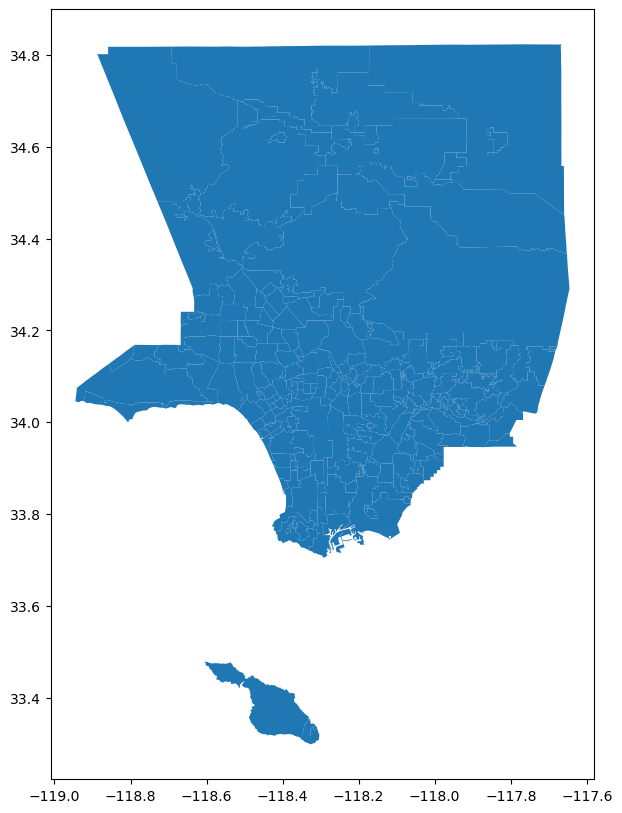

In [24]:
#Plot the file to undestrand the size of the "geometry" of the geojsn file
neighborhoods.plot(figsize=(12,10))

In [25]:
#shorten the data and generate a new dataframe with the deisred information.We only need specific variables and info

columns_to_keep = ['OBJECTID',
                   'spa',
                   'Neighborhood',
                   'sup_dist',
                  'geometry']

In [26]:
neighborhoods2 = neighborhoods[columns_to_keep]

In [27]:
#Check the size of the new, trimmed variable
neighborhoods2.shape

(244, 5)

In [28]:
#Create another variable trimming another information, this time 2 rows that contain information about the unwanted neighborhoods(islands below)

neighborhoods3 = neighborhoods2.drop([11, 207])

In [29]:
#Check the new variable
neighborhoods3.shape

(242, 5)

<Axes: >

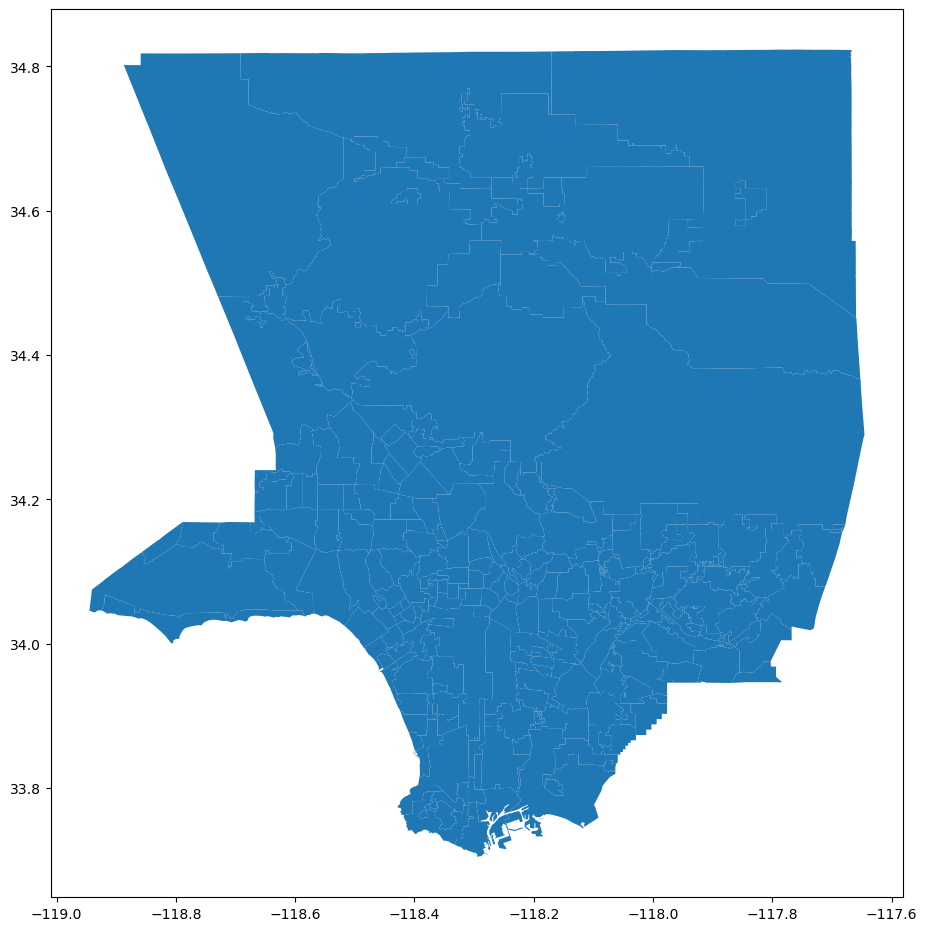

In [30]:
#Plot the new varaible with the unwanted land. Now LA Cojnty has been mapped
neighborhoods3.plot(figsize=(11,12))

In [31]:
#Import csv file with the % of commute time above 1 hour by neighborhood in LA County
commute=pd.read_csv('CTLC3.csv', delimiter=';')
commute.head()

,name,year,denom_tot_workers,Commute Time Above 1 Hour
0,Irwindale,2021,"804,94",15.25
1,Pico-Union,2021,"18793,13",16.64
2,Glendora,2021,"25208,2",17.26
3,Industry,2021,"6066,56",16.16
4,Sylmar,2021,"36939,14",11.57


In [32]:
#For the upcoming merge, we want to change the name of the variable "neighborhood" to allow the merge to work
commute.rename(columns={'name': 'Neighborhood'}, inplace=True)
commute.head()

,Neighborhood,year,denom_tot_workers,Commute Time Above 1 Hour
0,Irwindale,2021,"804,94",15.25
1,Pico-Union,2021,"18793,13",16.64
2,Glendora,2021,"25208,2",17.26
3,Industry,2021,"6066,56",16.16
4,Sylmar,2021,"36939,14",11.57


In [33]:
#Check bot databases have the same name of columnn
neighborhoods3.head()

,OBJECTID,spa,Neighborhood,sup_dist,geometry
0,1,SPA 1 - Antelope Valley,Acton,District 5,"MULTIPOLYGON Z (((-118.20262 34.53899 0.00000,..."
1,2,SPA 2 - San Fernando,Agoura Hills,District 3,"MULTIPOLYGON Z (((-118.76193 34.16820 0.00000,..."
2,3,SPA 1 - Antelope Valley,Agua Dulce,District 5,"MULTIPOLYGON Z (((-118.25468 34.55830 0.00000,..."
3,4,SPA 3 - San Gabriel,Alhambra,District 1,"MULTIPOLYGON Z (((-118.12175 34.10504 0.00000,..."
4,5,SPA 8 - South Bay,Alondra Park,District 2,"MULTIPOLYGON Z (((-118.32651 33.89757 0.00000,..."


In [216]:
#merge based on common element

merged_df = neighborhoods3.merge(commute,on='Neighborhood')



In [35]:
#Check the merge was succesfull
merged_df.head()

,OBJECTID,spa,Neighborhood,sup_dist,geometry,year,denom_tot_workers,Commute Time Above 1 Hour
0,1,SPA 1 - Antelope Valley,Acton,District 5,"MULTIPOLYGON Z (((-118.20262 34.53899 0.00000,...",2021,"1448,51",42.38
1,2,SPA 2 - San Fernando,Agoura Hills,District 3,"MULTIPOLYGON Z (((-118.76193 34.16820 0.00000,...",2021,"8032,5",15.27
2,3,SPA 1 - Antelope Valley,Agua Dulce,District 5,"MULTIPOLYGON Z (((-118.25468 34.55830 0.00000,...",2021,"2073,33",21.80
3,4,SPA 3 - San Gabriel,Alhambra,District 1,"MULTIPOLYGON Z (((-118.12175 34.10504 0.00000,...",2021,"40794,02",11.12
4,5,SPA 8 - South Bay,Alondra Park,District 2,"MULTIPOLYGON Z (((-118.32651 33.89757 0.00000,...",2021,"3869,87",16.85


In [36]:
#Check info
merged_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OBJECTID                   225 non-null    int64   
 1   spa                        225 non-null    object  
 2   Neighborhood               225 non-null    object  
 3   sup_dist                   225 non-null    object  
 4   geometry                   225 non-null    geometry
 5   year                       225 non-null    int64   
 6   denom_tot_workers          224 non-null    object  
 7   Commute Time Above 1 Hour  224 non-null    float64 
dtypes: float64(1), geometry(1), int64(2), object(4)
memory usage: 14.2+ KB


In [37]:
merged_df.shape


(225, 8)

<Axes: >

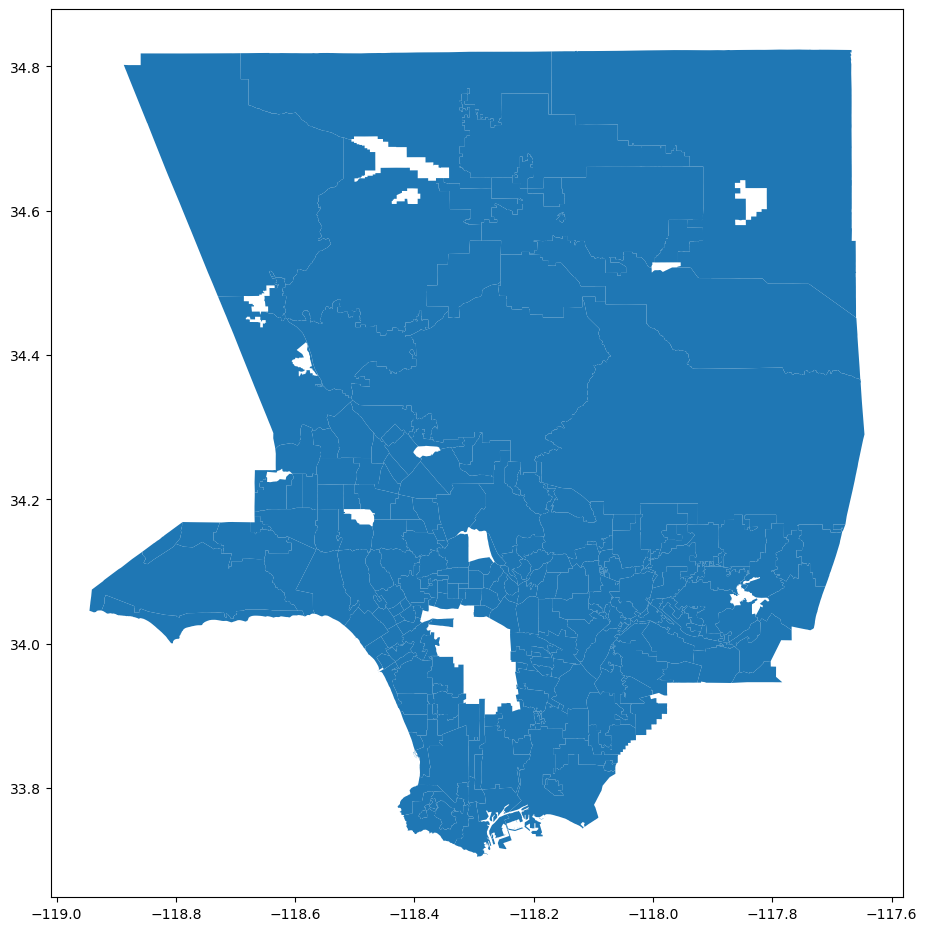

In [38]:
#Plot the merged database. Blank gaps in the map tells us the mssing neighborhoods in the previous databases
merged_df.plot(figsize=(11,12))

In [52]:
LAneighborhoods=gpd.read_file('LA_Neighborhoods.geojson')

In [53]:
print(merged_df.head())
print(LAneighborhoods.head())


   OBJECTID                      spa  Neighborhood    sup_dist  \
0         1  SPA 1 - Antelope Valley         Acton  District 5   
1         2     SPA 2 - San Fernando  Agoura Hills  District 3   
2         3  SPA 1 - Antelope Valley    Agua Dulce  District 5   
3         4      SPA 3 - San Gabriel      Alhambra  District 1   
4         5        SPA 8 - South Bay  Alondra Park  District 2   

                                            geometry  year denom_tot_workers  \
0  MULTIPOLYGON Z (((-118.20262 34.53899 0.00000,...  2021           1448,51   
1  MULTIPOLYGON Z (((-118.76193 34.16820 0.00000,...  2021            8032,5   
2  MULTIPOLYGON Z (((-118.25468 34.55830 0.00000,...  2021           2073,33   
3  MULTIPOLYGON Z (((-118.12175 34.10504 0.00000,...  2021          40794,02   
4  MULTIPOLYGON Z (((-118.32651 33.89757 0.00000,...  2021           3869,87   

   Commute Time Above 1 Hour  
0                      42.38  
1                      15.27  
2                      21.80 

In [55]:
import geopandas as gpd

# Assuming merged_df and LANeighborhoods are already loaded GeoDataFrames

# Perform the spatial join
joined_df = gpd.sjoin(merged_df, LAneighborhoods, how="inner", op="within")

# 'how' parameter:
# 'inner' means that only records with a match in both GeoDataFrames are returned.
# 'left' would keep all records from the left GeoDataFrame, with NaNs where there is no match.
# 'right' does the opposite.

# 'op' parameter defines the spatial operation to use for joining:
# 'within' checks if the geometry of the left GeoDataFrame is within the right GeoDataFrame.
# Other options include 'intersects', 'contains', etc., depending on your specific needs.

print(joined_df.head())


Empty GeoDataFrame
Columns: [OBJECTID_left, spa, Neighborhood, sup_dist, geometry, year, denom_tot_workers, Commute Time Above 1 Hour, index_right, OBJECTID_right, name]
Index: []


/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [56]:
pip install --upgrade geopandas rtree


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 13.1 MB/s eta 0:00:0000:01
  Attempting uninstall: rtree
    Found existing installation: Rtree 1.1.0
    Uninstalling Rtree-1.1.0:
      Successfully uninstalled Rtree-1.1.0
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.2
    Uninstalling geopandas-0.14.2:
      Successfully uninstalled geopandas-0.14.2
Note: you may need to restart the kernel to use updated packages.


# FIND LA neighborhoods in merged_df

In [251]:
import geopandas as gpd

# Assuming merged_df and LANeighborhoods are already loaded GeoDataFrames

# Perform the spatial join
# joined_df = gpd.sjoin(merged_df, LAneighborhoods, how="right", predicate='within')
# joined_df = gpd.overlay(merged_df, LAneighborhoods, how='intersection')
joined_df = merged_df.sjoin_nearest(LAneighborhoods, how="right",distance_col="distances", exclusive=True, rsuffix='LA')

# 'how' parameter:
# 'inner' means that only records with a match in both GeoDataFrames are returned.
# 'left' would keep all records from the left GeoDataFrame, with NaNs where there is no match.
# 'right' does the opposite.

# 'op' parameter defines the spatial operation to use for joining:
# 'within' checks if the geometry of the left GeoDataFrame is within the right GeoDataFrame.
# Other options include 'intersects', 'contains', etc., depending on your specific needs.

joined_df

/opt/conda/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,index_left,OBJECTID_left,spa,Neighborhood,sup_dist,year,denom_tot_workers,Commute Time Above 1 Hour,OBJECTID_LA,name,geometry,distances
0,142,154,SPA 4 - Metro,Pico-Union,District 1,2021,"18793,13",16.64,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",0.0
1,8,9,SPA 2 - San Fernando,Arleta,District 3,2021,"16799,37",12.49,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",0.0
1,116,128,SPA 2 - San Fernando,Mission Hills,District 3,2021,"8797,73",14.23,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",0.0
1,133,145,SPA 2 - San Fernando,Pacoima,District 3,2021,"32991,73",12.66,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",0.0
1,137,149,SPA 2 - San Fernando,Panorama City,District 3,2021,"32084,62",14.52,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112,224,242,SPA 2 - San Fernando,Woodland Hills,District 3,2021,"35051,78",20.36,113,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1...",0.0
113,92,101,SPA 2 - San Fernando,Lake Balboa,District 3,2021,"13589,97",14.99,114,Lake Balboa,"POLYGON ((-118.50116 34.22114, -118.50116 34.2...",0.0
113,127,139,SPA 2 - San Fernando,Northridge,District 3,2021,"33560,78",13.08,114,Lake Balboa,"POLYGON ((-118.50116 34.22114, -118.50116 34.2...",0.0
113,152,165,SPA 2 - San Fernando,Reseda,District 3,2021,"35152,96",15.99,114,Lake Balboa,"POLYGON ((-118.50116 34.22114, -118.50116 34.2...",0.0


In [246]:
different_names = []
additional_list = set()
for i in list(LAneighborhoods['name']):
    if i not in list(merged_df['Neighborhood']):
        matching = joined_df[joined_df['name'] == i]
        if len(matching) == 1:
            additional_list.add(list(matching['Neighborhood'])[0])
        else:
            additional_list |= set(matching['Neighborhood'])
            different_names.append(matching[['Neighborhood', 'name']])
print(len(different_names))
print(len(additional_list))
print(different_names)
additional_list

9
34
[     Neighborhood                    name
4     Culver City  Baldwin Hills/Crenshaw
4  Ladera Heights  Baldwin Hills/Crenshaw
4      West Adams  Baldwin Hills/Crenshaw,    Neighborhood             name
14     Downtown  Central-Alameda
14       Vernon  Central-Alameda,    Neighborhood                  name
17   Chatsworth  Chatsworth Reservoir
17   West Hills  Chatsworth Reservoir,        Neighborhood           name
38  Atwater Village  Griffith Park
38          Burbank  Griffith Park
38         Glendale  Griffith Park
38  Hollywood Hills  Griffith Park
38        Los Feliz  Griffith Park
38      Silver Lake  Griffith Park,          Neighborhood        name
40  Lake View Terrace  Hansen Dam
40            Pacoima  Hansen Dam
40       Shadow Hills  Hansen Dam,    Neighborhood             name
43    Koreatown  Harvard Heights
43   Pico-Union  Harvard Heights,    Neighborhood       name
50    Inglewood  Hyde Park
50  Westchester  Hyde Park,       Neighborhood      name
60     Beverlywo

{'Atwater Village',
 'Beverlywood',
 'Burbank',
 'Carthay',
 'Chatsworth',
 'Compton',
 'Culver City',
 'Downtown',
 'Encino',
 'Glendale',
 'Harbor Gateway',
 'Hollywood Hills',
 'Huntington Park',
 'Inglewood',
 'Koreatown',
 'Ladera Heights',
 'Lake Balboa',
 'Lake View Terrace',
 'Los Feliz',
 'Lynwood',
 'Mid-Wilshire',
 'Pacoima',
 'Palms',
 'Pico-Robertson',
 'Pico-Union',
 'Reseda',
 'Shadow Hills',
 'Sherman Oaks',
 'Silver Lake',
 'Van Nuys',
 'Vernon',
 'West Adams',
 'West Hills',
 'Westchester'}

85
Adding addtional list with len 34  25
94


,OBJECTID,spa,Neighborhood,sup_dist,geometry,year,denom_tot_workers,Commute Time Above 1 Hour
88,97,SPA 4 - Metro,Koreatown,District 2,"MULTIPOLYGON Z (((-118.28691 34.07651 0.00000,...",2021,"55032,08",14.28


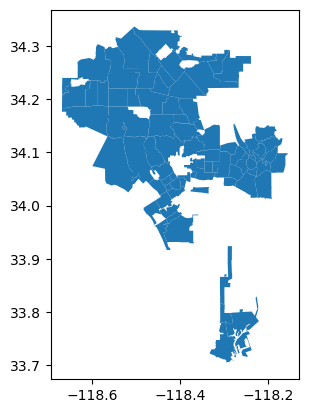

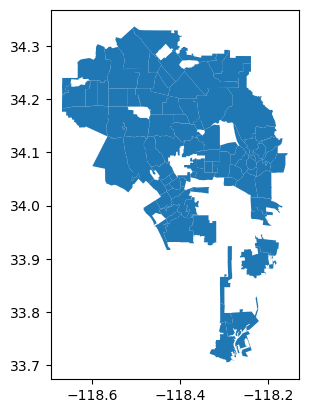

In [250]:
include_list = list(LAneighborhoods['name'])
new_LA_df = merged_df[(merged_df['Neighborhood'].isin(include_list))]
new_LA_df.plot()
print(len(new_LA_df))
print(f"Adding addtional list with len {len(additional_list)}  {len(set.intersection(set(include_list), set(additional_list)))}")
include_list.extend(list(additional_list))
new_LA_df = merged_df[(merged_df['Neighborhood'].isin(include_list))]

print(len(new_LA_df))
new_LA_df.plot()
new_LA_df[new_LA_df['Neighborhood'] == 'Koreatown']

,OBJECTID,spa,Neighborhood,sup_dist,geometry,year,denom_tot_workers,Commute Time Above 1 Hour
8,9,SPA 2 - San Fernando,Arleta,District 3,"MULTIPOLYGON Z (((-118.42202 34.22410 0.00000,...",2021,"16799,37",12.49
10,11,SPA 4 - Metro,Atwater Village,District 1,"MULTIPOLYGON Z (((-118.27832 34.15301 0.00000,...",2021,"6679,6",11.81
14,16,SPA 5 - West,Bel-Air,District 3,"MULTIPOLYGON Z (((-118.46901 34.12951 0.00000,...",2021,"2750,39",11.89
18,20,SPA 5 - West,Beverly Crest,District 3,"MULTIPOLYGON Z (((-118.45321 34.13181 0.00000,...",2021,"4597,19",10.99
19,21,SPA 4 - Metro,Beverly Grove,District 3,"MULTIPOLYGON Z (((-118.37249 34.08575 0.00000,...",2021,"12337,8",6.38
...,...,...,...,...,...,...,...,...
218,236,SPA 5 - West,Westwood,District 3,"MULTIPOLYGON Z (((-118.42991 34.07931 0.00000,...",2021,"21125,35",4.01
221,239,SPA 8 - South Bay,Wilmington,District 4,"MULTIPOLYGON Z (((-118.22476 33.82461 0.00000,...",2021,"23759,05",8.48
222,240,SPA 4 - Metro,Windsor Square,District 2,"MULTIPOLYGON Z (((-118.31371 34.07631 0.00000,...",2021,"3149,84",6.09
223,241,SPA 2 - San Fernando,Winnetka,District 3,"MULTIPOLYGON Z (((-118.56221 34.23150 0.00000,...",2021,"26104,59",14.37


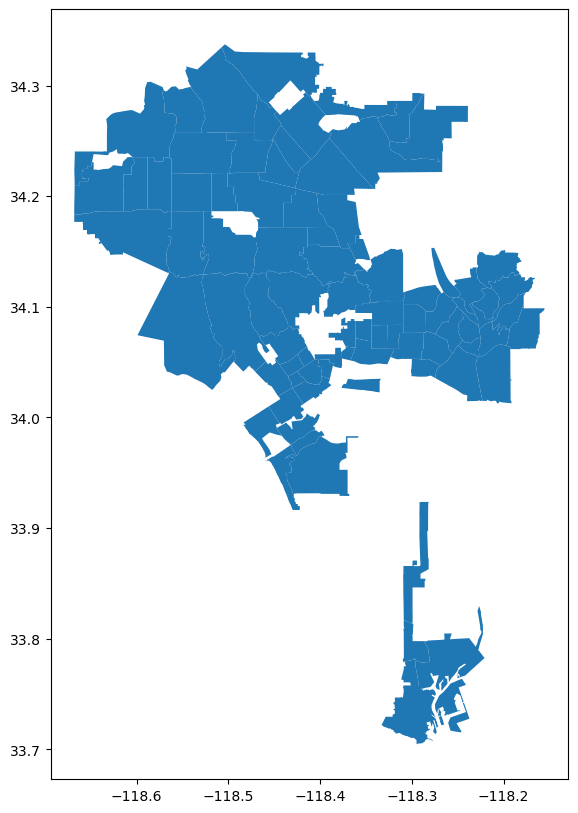

In [224]:
# merged_df.plot(figsize=(5,5))
# LAneighborhoods.plot(figsize=(5,5))
new_LA_df.plot(figsize=(10,10))
new_LA_df

In [97]:
#Check the merge was succesfull
print(len(joined_df))
joined_df.head()

114


,index_left,OBJECTID_left,spa,Neighborhood,sup_dist,year,denom_tot_workers,Commute Time Above 1 Hour,OBJECTID_right,name,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0..."


In [154]:
joined_df[joined_df['name'] == 'Adams-Normandie']

,index_left,OBJECTID_left,spa,Neighborhood,sup_dist,year,denom_tot_workers,Commute Time Above 1 Hour,OBJECTID_right,name,geometry,distances
0,142,154,SPA 4 - Metro,Pico-Union,District 1,2021,"18793,13",16.64,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",0.0


In [175]:
'Pico-Union' in list(merged_df['Neighborhood'])

True

In [92]:
merged_df

,OBJECTID,spa,Neighborhood,sup_dist,geometry,year,denom_tot_workers,Commute Time Above 1 Hour
0,1,SPA 1 - Antelope Valley,Acton,District 5,"MULTIPOLYGON Z (((-118.20262 34.53899 0.00000,...",2021,"1448,51",42.38
1,2,SPA 2 - San Fernando,Agoura Hills,District 3,"MULTIPOLYGON Z (((-118.76193 34.16820 0.00000,...",2021,"8032,5",15.27
2,3,SPA 1 - Antelope Valley,Agua Dulce,District 5,"MULTIPOLYGON Z (((-118.25468 34.55830 0.00000,...",2021,"2073,33",21.80
3,4,SPA 3 - San Gabriel,Alhambra,District 1,"MULTIPOLYGON Z (((-118.12175 34.10504 0.00000,...",2021,"40794,02",11.12
4,5,SPA 8 - South Bay,Alondra Park,District 2,"MULTIPOLYGON Z (((-118.32651 33.89757 0.00000,...",2021,"3869,87",16.85
...,...,...,...,...,...,...,...,...
220,238,SPA 3 - San Gabriel,Whittier Narrows,District 1,"MULTIPOLYGON Z (((-118.06940 34.05292 0.00000,...",2021,"249,74",29.97
221,239,SPA 8 - South Bay,Wilmington,District 4,"MULTIPOLYGON Z (((-118.22476 33.82461 0.00000,...",2021,"23759,05",8.48
222,240,SPA 4 - Metro,Windsor Square,District 2,"MULTIPOLYGON Z (((-118.31371 34.07631 0.00000,...",2021,"3149,84",6.09
223,241,SPA 2 - San Fernando,Winnetka,District 3,"MULTIPOLYGON Z (((-118.56221 34.23150 0.00000,...",2021,"26104,59",14.37


In [197]:
LAneighborhoods

,OBJECTID,name,geometry
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0..."
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2..."
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0..."
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788..."
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0..."
...,...,...,...
109,110,Wilmington,"MULTIPOLYGON (((-118.28331 33.75532, -118.2880..."
110,111,Windsor Square,"POLYGON ((-118.31404 34.06254, -118.31420 34.0..."
111,112,Winnetka,"POLYGON ((-118.56232 34.23199, -118.56232 34.2..."
112,113,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1..."


In [242]:
new_LA_df


,OBJECTID,spa,Neighborhood,sup_dist,geometry,year,denom_tot_workers,Commute Time Above 1 Hour
8,9,SPA 2 - San Fernando,Arleta,District 3,"MULTIPOLYGON Z (((-118.42202 34.22410 0.00000,...",2021,"16799,37",12.49
10,11,SPA 4 - Metro,Atwater Village,District 1,"MULTIPOLYGON Z (((-118.27832 34.15301 0.00000,...",2021,"6679,6",11.81
14,16,SPA 5 - West,Bel-Air,District 3,"MULTIPOLYGON Z (((-118.46901 34.12951 0.00000,...",2021,"2750,39",11.89
18,20,SPA 5 - West,Beverly Crest,District 3,"MULTIPOLYGON Z (((-118.45321 34.13181 0.00000,...",2021,"4597,19",10.99
19,21,SPA 4 - Metro,Beverly Grove,District 3,"MULTIPOLYGON Z (((-118.37249 34.08575 0.00000,...",2021,"12337,8",6.38
...,...,...,...,...,...,...,...,...
218,236,SPA 5 - West,Westwood,District 3,"MULTIPOLYGON Z (((-118.42991 34.07931 0.00000,...",2021,"21125,35",4.01
221,239,SPA 8 - South Bay,Wilmington,District 4,"MULTIPOLYGON Z (((-118.22476 33.82461 0.00000,...",2021,"23759,05",8.48
222,240,SPA 4 - Metro,Windsor Square,District 2,"MULTIPOLYGON Z (((-118.31371 34.07631 0.00000,...",2021,"3149,84",6.09
223,241,SPA 2 - San Fernando,Winnetka,District 3,"MULTIPOLYGON Z (((-118.56221 34.23150 0.00000,...",2021,"26104,59",14.37


<Axes: >

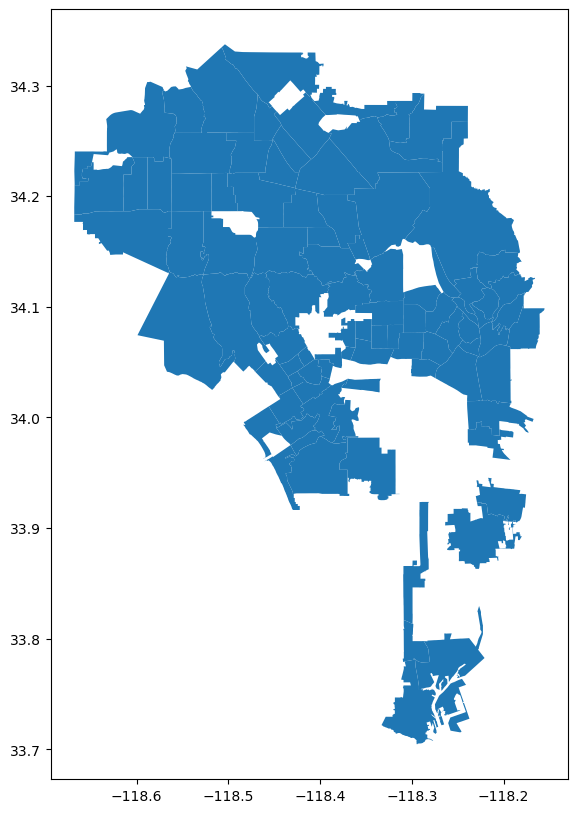

In [254]:
new_LA_df.plot(figsize=(10,10))

<Axes: >

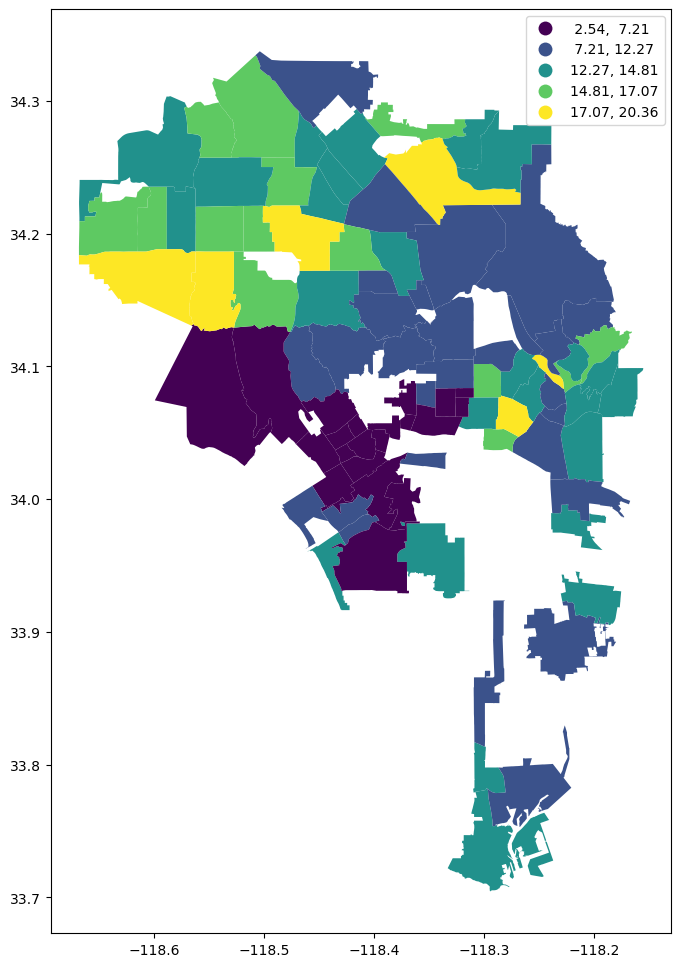

In [255]:
new_LA_df.plot(figsize=(11,12),
               column='Commute Time Above 1 Hour',
               legend=True,
               scheme='NaturalBreaks')

In [256]:
new_LA_df.shape


(94, 8)

In [257]:
new_La_df.print

NameError: name 'new_La_df' is not defined